In [11]:
from collections import defaultdict

def load_results(path):
    results = {}
    with open(path) as fin:
        for line in fin:
            cols = line.strip().split(":")
            if len(cols) < 5:
                continue

            exp = float(cols[1].strip())
            dataset = cols[3].strip()
            value = float(cols[5].strip())

            if dataset not in results:
                results[dataset] = defaultdict(list)
                
            results[dataset][exp].append(value)
    return results

results = load_results("./results_reorder.txt")

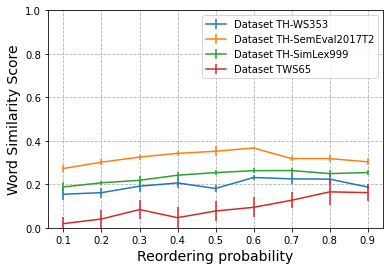

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot(title, results):
    for d in results:
        numbers = results[d]
        X = numbers.keys()
        values = []
        std = []
        for x in X:
            values.append(np.mean(numbers[x]))
            std.append(np.std(numbers[x]))

        plt.errorbar(X, values, std)
        plt.ylim(0, 1)

    plt.legend(results.keys())

    plt.xlabel(title, fontsize=14)
    plt.ylabel('Word Similarity Score', fontsize=14)
    plt.grid(True, which='both', linestyle='--')
    plt.show()

plot('Reordering probability', results)